#### 간단한 데이터셋 생성 & 시각화

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset 1
D1 = np.array([[1.0, 1.2, 3, 4, 5, 6],
               [1.5, 3, 2.3, 5.3, 3.8, 5.5]])

# Dataset 2
D2 = np.array([[-0.6, 1.0, 1.2, 3, 4, 5, 6],
               [2.9, 1.5, 3, 2.3, 5.3, 3.8, 5.5]])

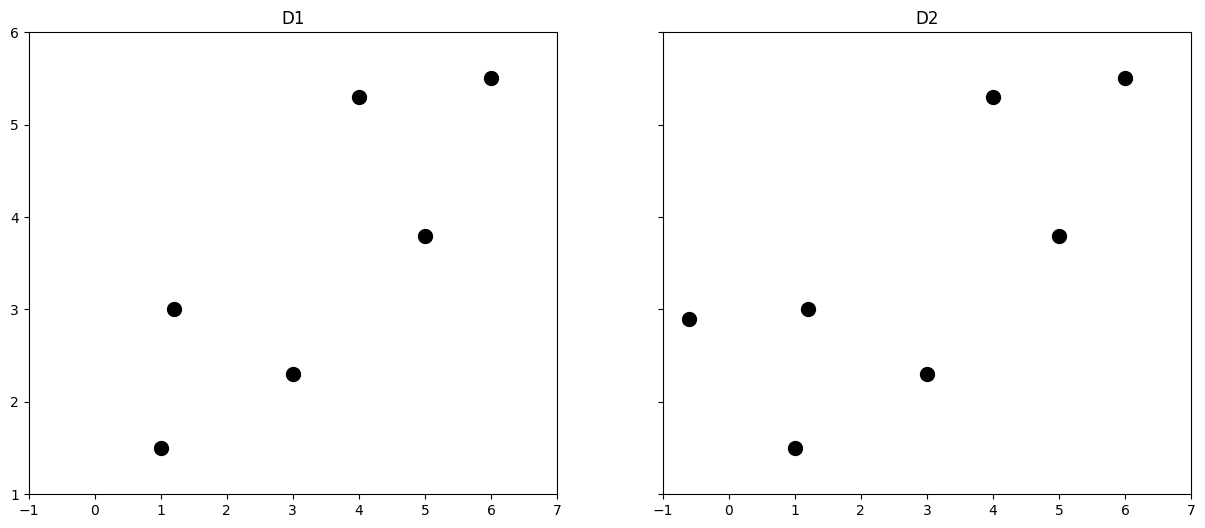

In [6]:
# Dataset 1, 2 그려보기
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches((15, 6))

ax1.plot(D1[0], D1[1], 'ko', markersize=10)
ax1.set_xlim([-1, 7])
ax1.set_ylim([1, 6])
ax1.set_title('D1')

ax2.plot(D2[0], D2[1], 'ko', markersize=10)
ax2.set_xlim([-1, 7])
ax2.set_ylim([1, 6])
ax2.set_title('D2')

plt.show()

#### 필요한 함수 정의

In [8]:
# 머신러닝 함수 정의
def machine_learning(D):
    # 독립변수(X)와 종속변수(y) 분리
    N = D.shape[1]
    X = np.c_[np.ones(N), D[0]]
    y = D[1]

    w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
    return w

def more_clever(D):
    first, last = D[:, 0], D[:, -1]
    w1 = (last[1] - first[1]) / (last[0] - first[0])
    w0 = -w1 * first[0] + first[1]
    return (w0, w1)

def f(x, w):
    return w[1] * x + w[0]

#### 코드 실행 및 결과 추출

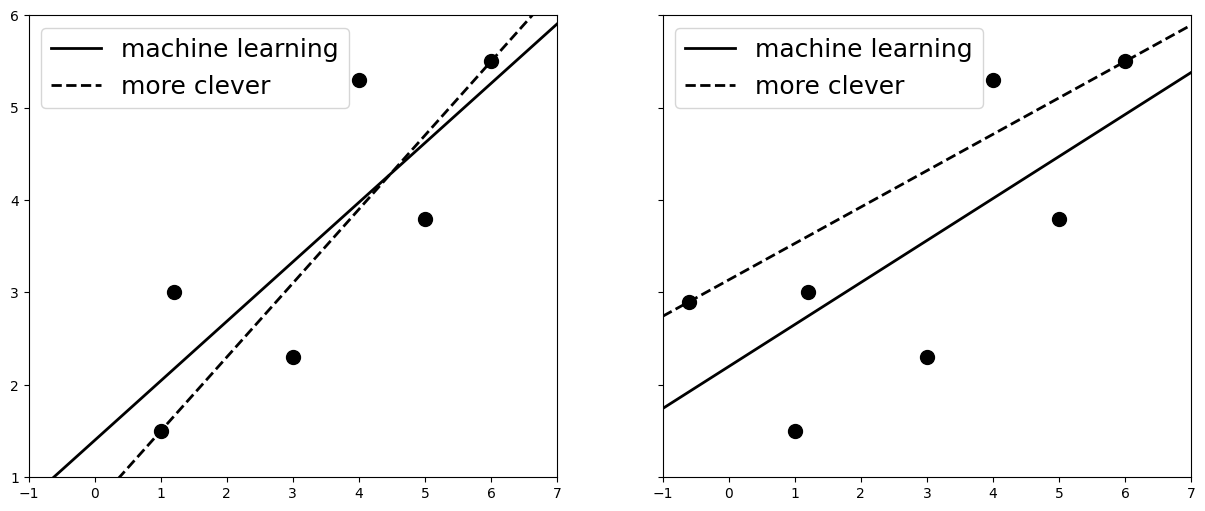

In [9]:
w_ml_d1 = machine_learning(D1)
w_mc_d1 = more_clever(D1)

w_ml_d2 = machine_learning(D2)
w_mc_d2 = more_clever(D2)

x = np.linspace(-1, 7, 100)

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches((15,6))

ax1.plot(D1[0], D1[1], 'ko', markersize=10)
ax1.plot(x, f(x, w_ml_d1), c='k', lw=2, label='machine learning')
ax1.plot(x, f(x, w_mc_d1), '--', c='k', lw=2, label='more clever')
ax1.set_xlim([-1, 7])
ax1.set_ylim([1, 6])
ax1.legend(fontsize=18)

ax2.plot(D2[0], D2[1], 'ko', markersize=10)
ax2.plot(x, f(x, w_ml_d2), c='k', lw=2, label='machine learning')
ax2.plot(x, f(x, w_mc_d2), '--', c='k', lw=2, label='more clever')
ax2.set_xlim([-1, 7])
ax2.set_ylim([1, 6])
ax2.legend(fontsize=18)

plt.show()

#### 150회 반복하여 최적의 선 찾아가기

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset 1
D1 = np.array([[1.0, 1.2, 3, 4, 5, 6],
               [1.5, 3, 2.3, 5.3, 3.8, 5.5]])

num_iters = 150 # 반복 횟수
eta = 0.02 # 학습률, 얼마만큼씩 학습 할 것인가: Gradient에서 얼마만큼씩 움직이는지 생각하면 됨

np.random.seed(2)
w = np.random.randn(2) # 무작위로 초기화
N = D1.shape[1] 

ws, L = [], []

# np.ones: 1열에는 숫자 1, 2열에는 데이터의 x좌표가 있는 행렬 X 만들기
# X: (N, 2), y: (N, )
X = np.c_[np.ones(N), D1[0]]
y = D1[1]

# E를 반복하며 T 개선
for i in range(num_iters):
    # grad L 
    c = np.dot(X.T, np.dot(X, w) - y)
    # 안전장치 grad L을 이용하여 w 수정하기
    w -= eta * c
    # w가 변화되는 과정 저장
    ws.append(w)

    # 손실 계산
    L.append(((np.dot(X, w) - y) ** 2).sum() / 2)

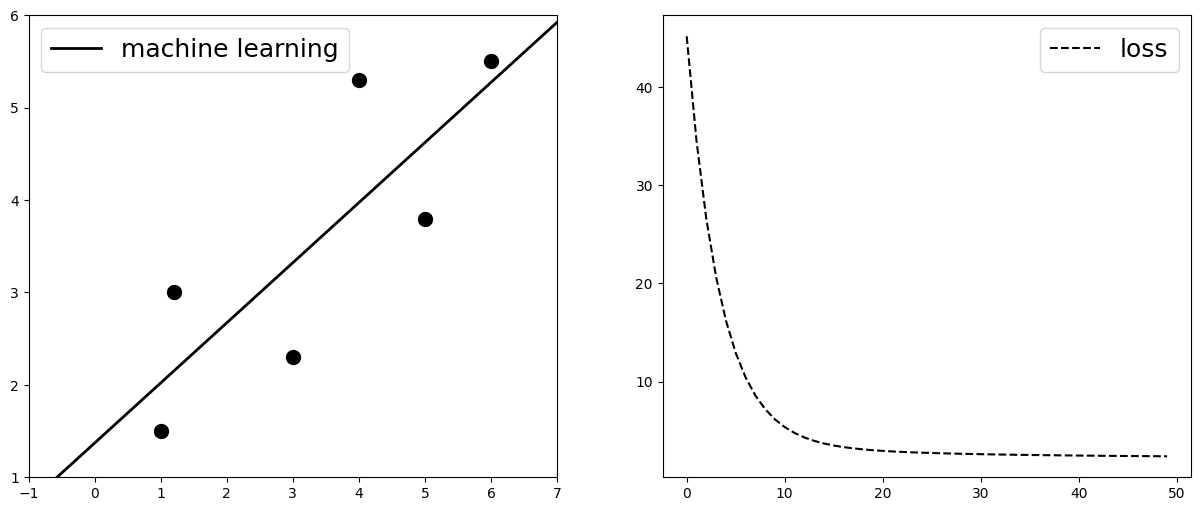

In [11]:
x = np.linspace(-1, 7, 100)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches((15, 6))

ax1.plot(D1[0], D1[1], 'ko', markersize=10)
ax1.plot(x, f(x, w), c='k', lw=2, label='machine learning')
ax1.set_xlim([-1, 7])
ax1.set_ylim([1, 6])
ax1.legend(fontsize=18)

ax2.plot(L[:50], '--', c='k', label='loss')
ax2.legend(fontsize=18)
plt.show()